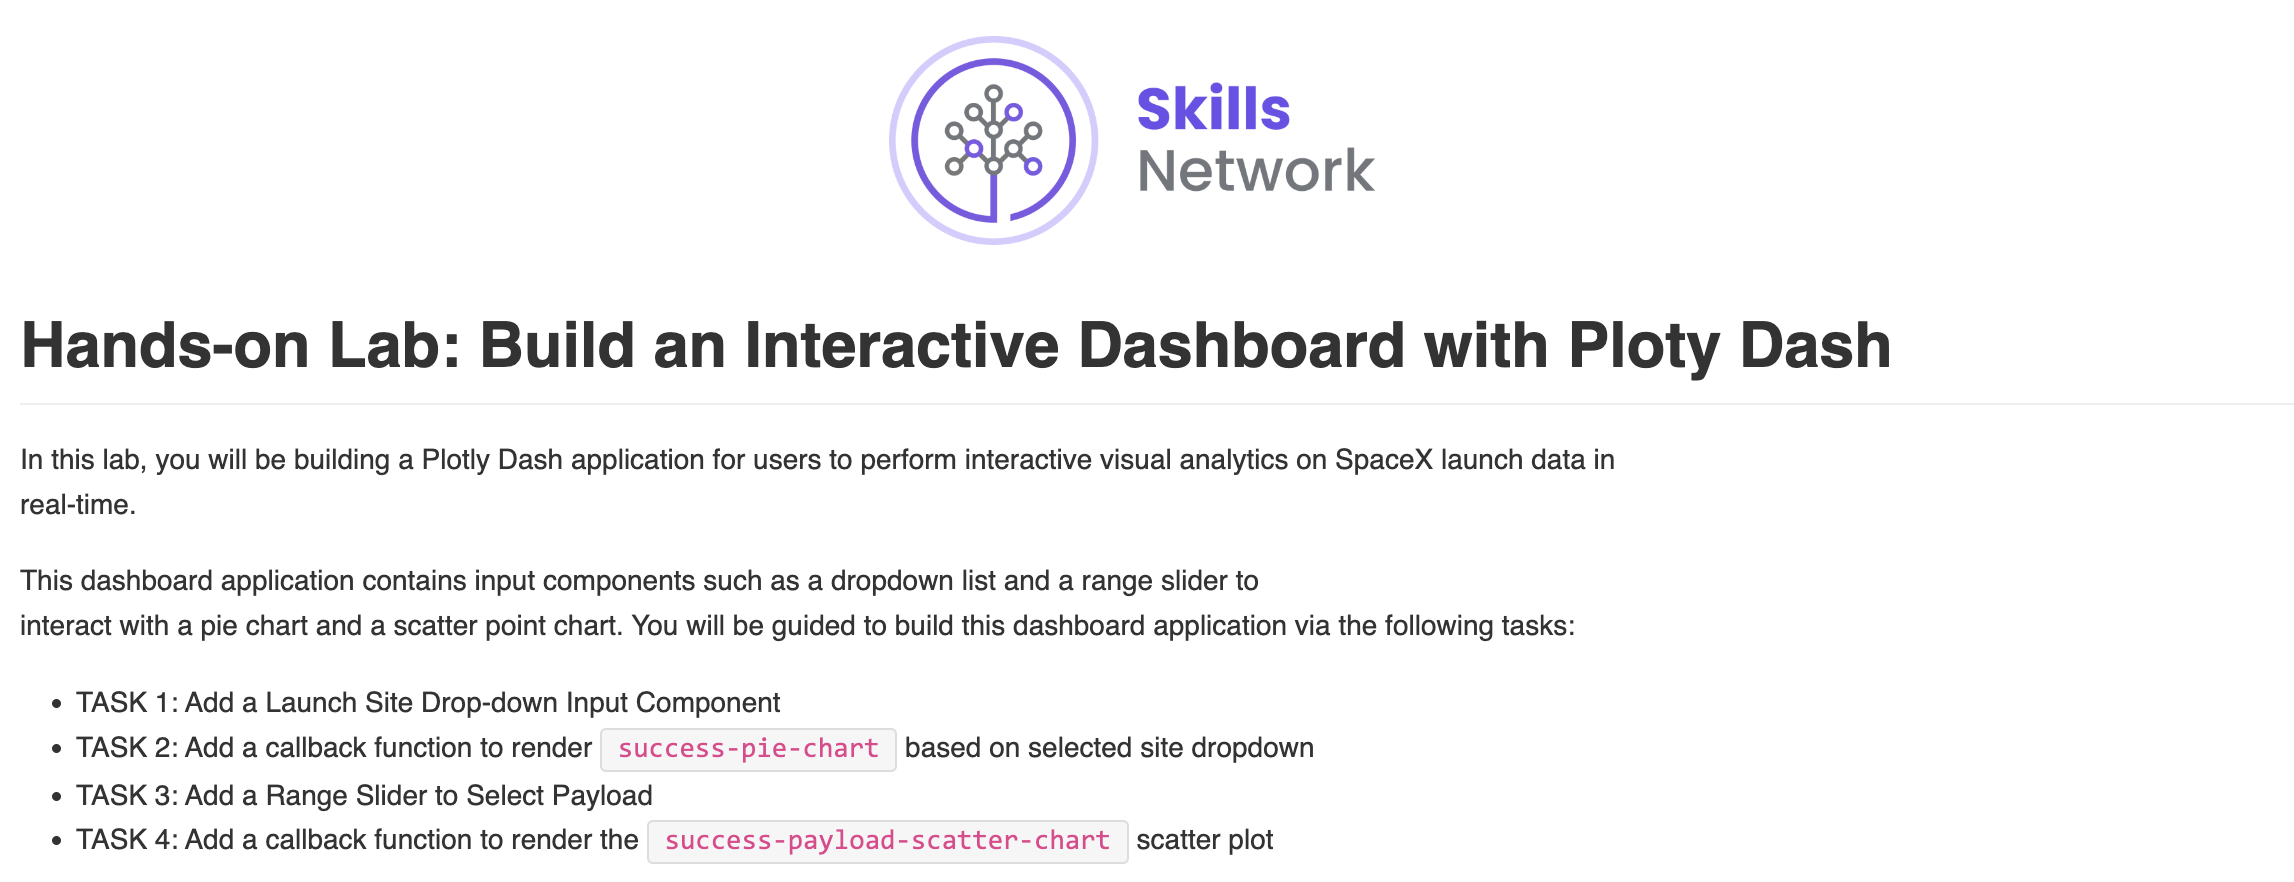

In [ ]:
python3.8 -m pip install packaging
python3.8 -m pip install pandas dash
pip3 install httpx==0.20 dash plotly

In [ ]:
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"

In [ ]:
# Import required libraries
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the SpaceX data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard',
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),

    # TASK 1: Add a dropdown list to enable Launch Site selection
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'}
        ] + [{'label': site, 'value': site} for site in spacex_df['Launch Site'].unique()],
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    ),
    html.Br(),

    # TASK 2: Add a pie chart to show the total successful launches count for all sites
    html.Div(dcc.Graph(id='success-pie-chart')),
    html.Br(),

    html.P("Payload range (Kg):"),

    # TASK 3: Add a slider to select payload range
    dcc.RangeSlider(
        id='payload-slider',
        min=min_payload,
        max=max_payload,
        step=1000,
        marks={i: str(i) for i in range(0, int(max_payload) + 1000, 2000)},
        value=[min_payload, max_payload]
    ),
    html.Br(),

    # TASK 4: Add a scatter chart to show the correlation between payload and launch success
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# TASK 2: Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        fig = px.pie(
            spacex_df,
            names='class',
            title='Total Success and Failure Launches for All Sites'
        )
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == selected_site]
        fig = px.pie(
            filtered_df,
            names='class',
            title=f'Total Success and Failure Launches for {selected_site}'
        )
    return fig

# TASK 4: Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
     Input(component_id='payload-slider', component_property='value')]
)
def update_scatter_chart(selected_site, payload_range):
    low, high = payload_range
    filtered_df = spacex_df[
        (spacex_df['Payload Mass (kg)'] >= low) & (spacex_df['Payload Mass (kg)'] <= high)
    ]

    if selected_site != 'ALL':
        filtered_df = filtered_df[filtered_df['Launch Site'] == selected_site]

    fig = px.scatter(
        filtered_df,
        x='Payload Mass (kg)',
        y='class',
        color='Booster Version Category',
        title='Payload vs. Success for All Sites' if selected_site == 'ALL' else f'Payload vs. Success for {selected_site}',
        labels={'class': 'Launch Success'}
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
python3.11 spacex_dash_app.py